# Analysis de origen de los datos de imagen
Se comprueba y compara el rendimiento de un modelo convertido a TensorFlow Lite en función del tipo de optimización
aplicada.
## Imports

In [1]:
from image_model_evaluation import tensorflow_lite_model_evaluation

## Parámetros
Parámetros del análisis que se efectuará.

In [2]:
project_dir = "/home/daniel/PycharmProjects/tfg-tinyml"
saved_models_dir = f"{project_dir}/saved models/image"
micro_data_test_dir = f"{project_dir}/samples/microcontroller/preprocessed image/test"
non_quantized_model_path = f"{saved_models_dir}/tensorflow lite/MicroImgDataModel.tflite"
quantized_model_path = f"{saved_models_dir}/tensorflow lite/MicroImgDataModelQuant.tflite"
qat_model_path = f"{saved_models_dir}/tensorflow lite/MicroImgDataModelQAT.tflite"
label_index_dir = f"{saved_models_dir}/label index mappings"
label_index_path = f"{label_index_dir}/MicroImgDataModel.joblib"

## Modelo sin cuantizar
Comprobamos el rendimiento del modelo sin cuantizar sobre los datos de la partición test de datos captados con
microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/image/tensorflow lite/MicroImgDataModel.tflite".
Model size 131.6796875 Kb
Testing model with files located in "/home/daniel/PycharmProjects/tfg-tinyml/samples/microcontroller/preprocessed image/test".
Testing 24 images from class face.
Testing 24 images from class mask.
Testing 21 images from class nothing.


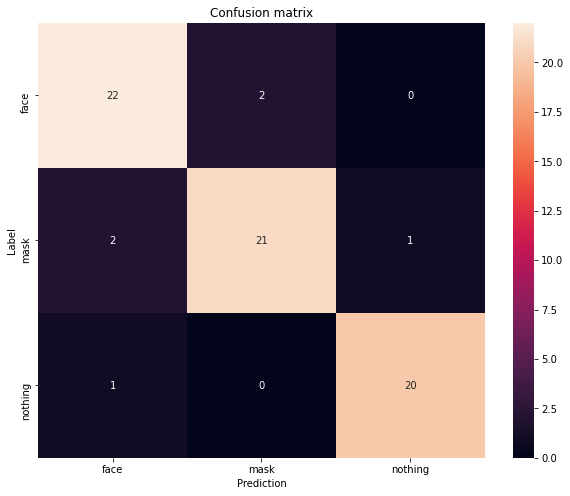

              precision    recall  f1-score   support

        face    0.88000   0.91667   0.89796        24
        mask    0.91304   0.87500   0.89362        24
     nothing    0.95238   0.95238   0.95238        21

    accuracy                        0.91304        69
   macro avg    0.91514   0.91468   0.91465        69
weighted avg    0.91352   0.91304   0.91301        69

Average time: 1.0672030241593071 ms
Max time: 1.6891956329345703 ms
Min time: 0.8416175842285156 ms


In [3]:
tensorflow_lite_model_evaluation(non_quantized_model_path, label_index_path, [micro_data_test_dir])

## Modelo cuantizado
Comprobamos el rendimiento del modelo cuantizado sobre los datos de la partición test de datos captados con
microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/image/tensorflow lite/MicroImgDataModelQuant.tflite".
Model size 45.9140625 Kb
Testing model with files located in "/home/daniel/PycharmProjects/tfg-tinyml/samples/microcontroller/preprocessed image/test".
Testing 24 images from class face.
Testing 24 images from class mask.
Testing 21 images from class nothing.


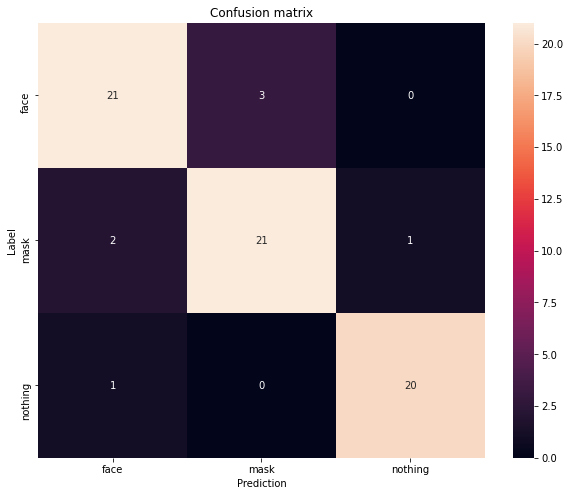

              precision    recall  f1-score   support

        face    0.87500   0.87500   0.87500        24
        mask    0.87500   0.87500   0.87500        24
     nothing    0.95238   0.95238   0.95238        21

    accuracy                        0.89855        69
   macro avg    0.90079   0.90079   0.90079        69
weighted avg    0.89855   0.89855   0.89855        69

Average time: 10.130536729010982 ms
Max time: 34.62791442871094 ms
Min time: 9.04226303100586 ms
Quantized models can perform slower as they are intended to work on ARM devices.


In [4]:
tensorflow_lite_model_evaluation(quantized_model_path, label_index_path, [micro_data_test_dir], quantized=True)

## Modelo QAT
Comprobamos el rendimiento del modelo cuantizado durante el entrenamiento sobre los datos de la partición test de datos
captados con microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/image/tensorflow lite/MicroImgDataModelQAT.tflite".
Model size 46.03125 Kb
Testing model with files located in "/home/daniel/PycharmProjects/tfg-tinyml/samples/microcontroller/preprocessed image/test".
Testing 24 images from class face.
Testing 24 images from class mask.
Testing 21 images from class nothing.


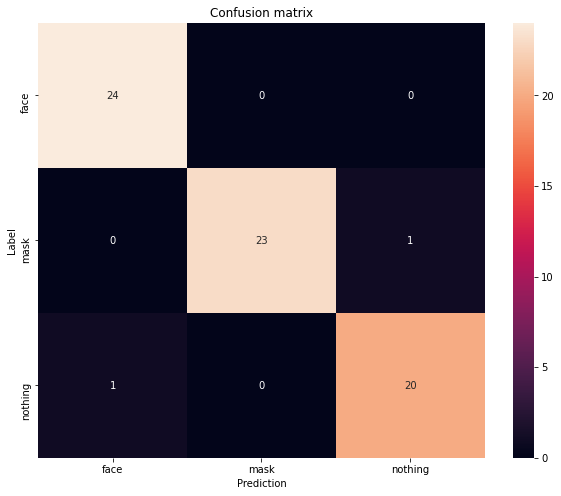

              precision    recall  f1-score   support

        face    0.96000   1.00000   0.97959        24
        mask    1.00000   0.95833   0.97872        24
     nothing    0.95238   0.95238   0.95238        21

    accuracy                        0.97101        69
   macro avg    0.97079   0.97024   0.97023        69
weighted avg    0.97159   0.97101   0.97101        69

Average time: 9.497037832287775 ms
Max time: 14.597654342651367 ms
Min time: 8.816719055175781 ms
Quantized models can perform slower as they are intended to work on ARM devices.


In [5]:
tensorflow_lite_model_evaluation(qat_model_path, label_index_path, [micro_data_test_dir], quantized=True)